In [1]:
%matplotlib inline

/Users/joncomo/miniconda2/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import clear_output

In [3]:
# picture:
# 3 - 4 - 5 - 6 - 7
# 0       1       2

# reward at 5->1, death or punishment at 3->0 and 7->2

# phi(s, a) -> [states x actions] matrix

In [4]:
STATES = 8
ACTIONS = 4

A_RANGE = range(ACTIONS)
S_RANGE = range(STATES)

# link rewards
LR = np.zeros([STATES, STATES])
LR[5, 1] = 1.0
LR[3, 0] = -1.0
LR[7, 2] = -1.0

# s -> sp by applying action a
U = 0 # up
D = 1 # down
L = 2 # left
R = 3 # right

S = np.zeros([STATES, ACTIONS], dtype=np.int32)
for s in S_RANGE:
    S[s, :] = s
S[0, U] = 3

S[1, U] = 5

S[2, U] = 7

S[3, D] = 0
S[3, R] = 4

S[4, L] = 3
S[4, R] = 5

S[5, L] = 4
S[5, R] = 6
S[5, D] = 1

S[6, L] = 5
S[6, R] = 7

S[7, L] = 6
S[7, D] = 2

# init params
theta = np.random.random_sample([STATES, ACTIONS])
w = np.random.random_sample([STATES, ACTIONS])

# dicount factor
gamma = 0.8

def phi(s, a):
    z = np.zeros([STATES, ACTIONS])
    if s == 6:
        s = 4
    if s == 1:
        s = 0
    if s == 2:
        s = 0
    z[s, a] = 1
    return z

def theta_dot_phi(s, a):
    return np.sum(np.multiply(phi(s, a), theta))

def policy(s, a):
    return np.exp(theta_dot_phi(s, a)) / np.sum(np.exp([theta_dot_phi(s, aa) for aa in A_RANGE]))

def expected_phi(s):
    return np.sum([policy(s, aa) * phi(s, aa) for aa in A_RANGE], axis=0)

def phi_min_exp_phi(s, a):
    return phi(s, a) - expected_phi(s)

def q(s, a):
    return np.sum(np.multiply(w, phi(s, a)))

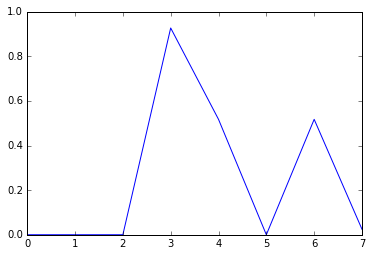

In [9]:
# learning rates
alpha = 0.01
beta = 0.01

for episode in range(1000):
    
    s = np.random.randint(STATES)
    a = np.random.choice(A_RANGE, p=np.array([policy(s, aa) for aa in A_RANGE]))
    
    #path = []
    
    for i in range(50):
        
        #path.append(s)
        
        sp = S[s, a]
        if sp == s:
            continue # nothing changes if s transitions to itself
            
        ap = np.random.choice(A_RANGE, p=[policy(sp, aa) for aa in A_RANGE])
        
        r = LR[s, sp]
        
        delta = r + gamma * q(sp, ap) - q(s, a)
        
        # update parameters
        theta = theta + alpha * phi_min_exp_phi(s, a) * q(s, a)
        w = w + beta * delta * phi(s, a)
        
        s = sp
        a = ap
        
    if episode % 100 == 0:
        #print("episode: {}".format(episode))
        clear_output(wait=True)
        view_action = R
        vis_policy = np.array([[policy(ss, aa) for aa in A_RANGE] for ss in S_RANGE])
        f = plt.plot(S_RANGE, vis_policy[:,view_action])
        plt.show()

        
    #clear_output(wait=True)
    #print(' '.join(map(str, path)))
    #print(''.join(['{}: v = {}\n'.format(s, v[s]) for s in S_RANGE]))

    #v = np.sum([[policy(ss, aa)*q(ss, aa) for aa in A_RANGE] for ss in S_RANGE], axis=1)
    #f = plt.plot(v)
    #plt.show()

0: 2.21368785061
1: 2.21368785061
2: 2.21368785061
3: 1.25827639736
4: 1.62402825298
5: 2.76924244535
6: 1.62402825298
7: 1.24785887419



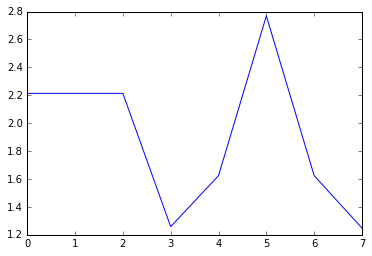

In [69]:
# State values
v = np.sum([[policy(ss, aa)*q(ss, aa) for aa in A_RANGE] for ss in S_RANGE], axis=1)
print(''.join(['{}: {}\n'.format(s, v[s]) for s in S_RANGE]))

f = plt.plot(v)

# Picture
# 3 - 4 - 5 - 6 - 7
# 0       1       2

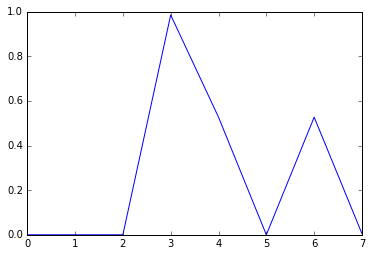

In [70]:
# Policy

view_action = R

vis_policy = np.array([[policy(ss, aa) for aa in A_RANGE] for ss in S_RANGE])
f = plt.plot(S_RANGE, vis_policy[:,view_action])

# Picture
# 3 - 4 - 5 - 6 - 7
# 0       1       2

In [72]:
# Picture
# 3 - 4 - 5 - 6 - 7
# 0       1       2
policy(6, L)

0.46440718436058898